In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show_img_from_np(np_image, title=''):
    # Convertir de BGR (formato de OpenCV) a RGB (formato para matplotlib)
    imagen_rgb = np_image

    # Mostrar la imagen en el notebook
    plt.imshow(imagen_rgb)
    plt.title(title)
    plt.axis('off')  # Ocultar ejes
    plt.show()

def show_img_from_cv2(np_image, title='', color_type_definition=cv2.COLOR_BGR2RGB):
    imagen_convertida = cv2.cvtColor(np_image, color_type_definition)

    plt.title(title)
    plt.axis('off')

    # Si la imagen es 2D (escala de grises), usar cmap
    if len(imagen_convertida.shape) == 2:
        plt.imshow(imagen_convertida, cmap='gray')
    else:
        plt.imshow(imagen_convertida)

    plt.show()

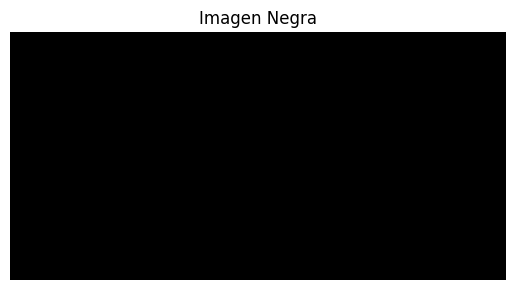

In [15]:
resolution = (100, 200, 3)
imagen_negra = np.zeros(resolution, dtype=np.uint8)

show_img_from_np(imagen_negra)

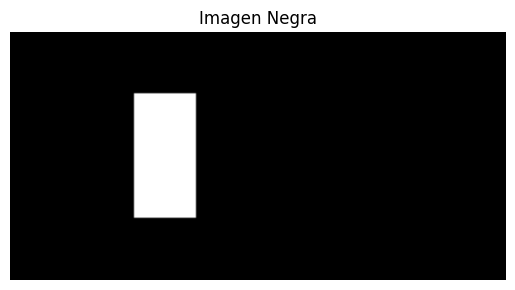

In [16]:
resolution = (100, 200)
imagen_gris = np.zeros(resolution, dtype=np.uint8)
imagen_gris[25:75, 50:75] = 255
show_img_from_np(imagen_gris)

## Ejercicio #1

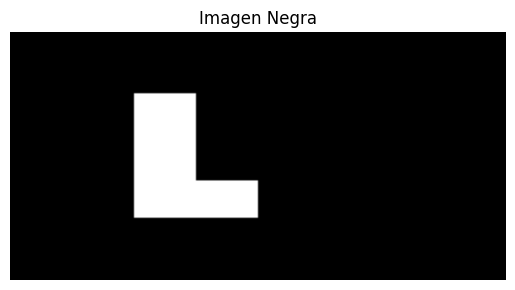

In [22]:
resolution = (100, 200)
imagen_gris_L = np.zeros(resolution, dtype=np.uint8)
imagen_gris_L[25:75, 50:75] = 255
imagen_gris_L[60:75, 50:100] = 255
show_img_from_np(imagen_gris_L)

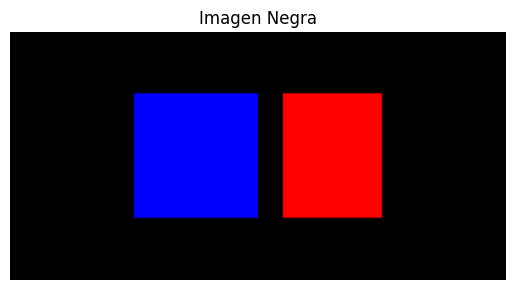

In [31]:
resolution = (100, 200, 3)
img = np.zeros(resolution, dtype=np.uint8)
img[25:75, 50:100] = [0, 0, 255]
img[25:75, 110:150] = [255, 0, 0]
show_img_from_np(img)

## Ejercicio 2 y 3
Crear la bandera nacional de bolivia

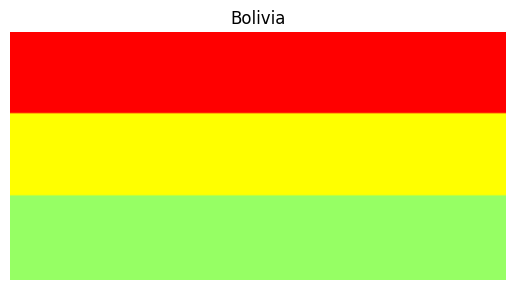

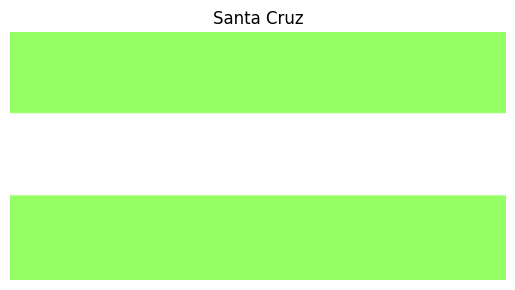

In [46]:
red = [255, 0, 0]
yellow = [255, 255, 0]
green = [150, 255, 100]
white = [255,255,255]

img = np.zeros(resolution, dtype=np.uint8)

# Bolivia
img[0:33, :] = red
img[33:66, :] = yellow
img[66:100, :] = green
show_img_from_np(img, 'Bolivia')

# Santa Cruz

img[0:33, :] = green
img[33:66, :] = white
img[66:100, :] = green
show_img_from_np(img, 'Santa Cruz')

Intensidad_Gris = (0.299 * Rojo) + (0.587 * Verde) + (0.114 * Azul)

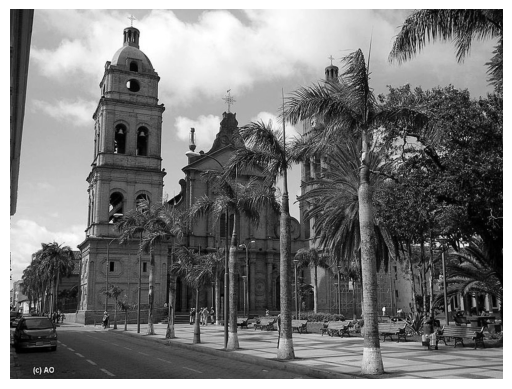

In [71]:
nombre_archivo = "images/catedral.jpg"
imagen_color = cv2.imread(nombre_archivo)
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
show_img_from_cv2(imagen_color, color_type_definition=cv2.COLOR_BGR2GRAY)

Histograma del Color

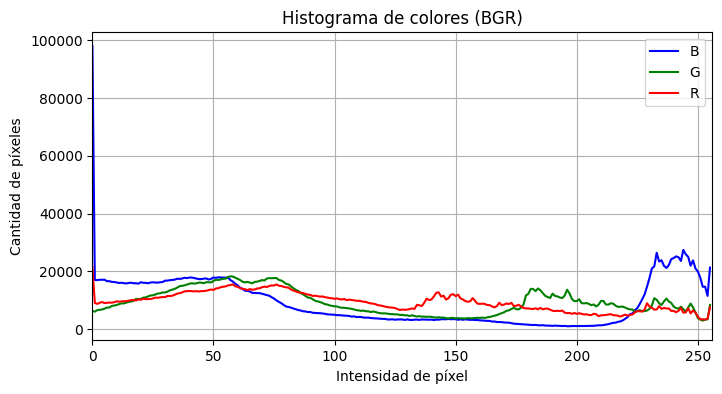

In [67]:
# Separar los canales BGR
canales = ('b', 'g', 'r')
colores = {'b': 'blue', 'g': 'green', 'r': 'red'}

plt.figure(figsize=(8, 4))
for i, canal in enumerate(canales):
    hist = cv2.calcHist([imagen_color], [i], None, [256], [0, 256])
    plt.plot(hist, color=colores[canal], label=canal.upper())
    plt.xlim([0, 256])

plt.title('Histograma de colores (BGR)')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.legend()
plt.grid(True)
plt.show()

## Umbrales de Otsu
$$  \sigma_b^2(t) = w_0(t)w_1(t)(\mu_0(t) - \mu_1(t))^2 $$

* t: valor del umbral 0 - 255
* W: Probabilidad de pertenencia del pixel
* mu: intencidad de los pixeles 0 -1

In [ ]:
$$  \sigma_b^2(t) = w_0(t)w_1(t)(\mu_0(t) - \mu_1(t))^2 $$

* t: valor del umbral 0 - 255
* W: Probabilidad de pertenencia del pixel
* mu: intencidad de los pixeles 0 -1

127.0


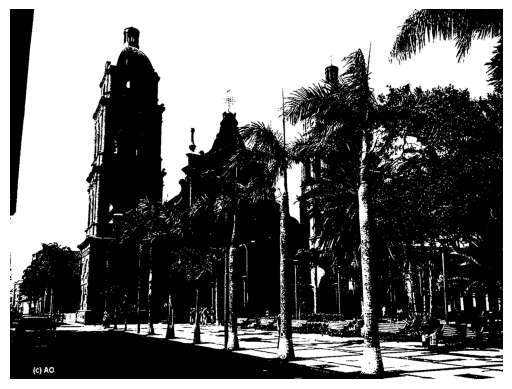

In [75]:
umbral_otsu, imagen_umbralizada = cv2.threshold(imagen_gris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(umbral_otsu)
show_img_from_cv2(imagen_umbralizada)

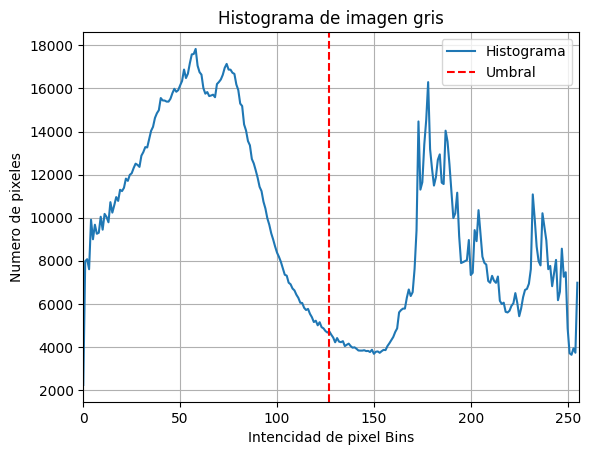

In [76]:
histograma_gris = cv2.calcHist([imagen_gris],[0],None,[256],[0,256])

plt.figure()
plt.title('Histograma de imagen gris')
plt.xlabel('Intencidad de pixel Bins')
plt.ylabel('Numero de pixeles')
plt.plot(histograma_gris)
plt.xlim([0,256])

plt.axvline(x=umbral_otsu, color='r', linestyle='--')
plt.legend(['Histograma', 'Umbral'])
plt.grid()
plt.show()

# Ejercicio Nro 4
* Cargar una imagen de su persona
* Convertir a gris
* Umbralizar la imagen
* Obtener el histograma con el umbral de su imagen

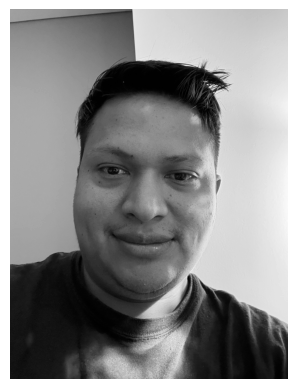

In [5]:
# cargar una imagen de su persona
nombre_archivo = "images/bpdarlyn.jpg"
imagen_color = cv2.imread(nombre_archivo)
# Convertir a Gris
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
show_img_from_cv2(imagen_color, color_type_definition=cv2.COLOR_BGR2GRAY)

115.0


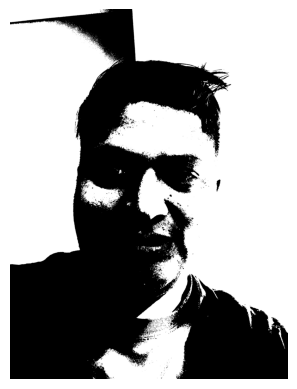

In [79]:
# Umbralizar la imagen
umbral_otsu, imagen_umbralizada = cv2.threshold(imagen_gris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(umbral_otsu)
show_img_from_cv2(imagen_umbralizada)

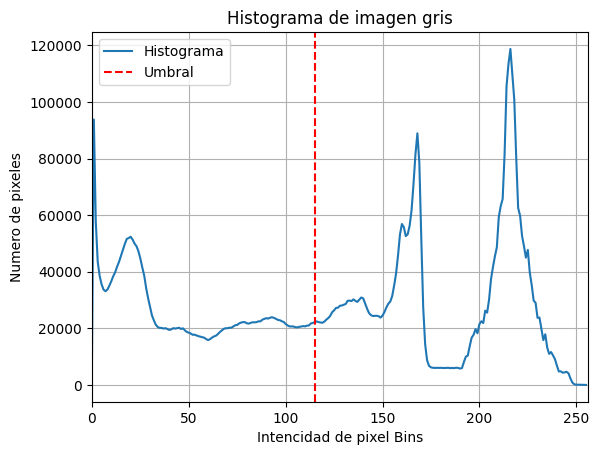

In [80]:
# Histograma de Umbral
histograma_gris = cv2.calcHist([imagen_gris],[0],None,[256],[0,256])

plt.figure()
plt.title('Histograma de imagen gris')
plt.xlabel('Intencidad de pixel Bins')
plt.ylabel('Numero de pixeles')
plt.plot(histograma_gris)
plt.xlim([0,256])

plt.axvline(x=umbral_otsu, color='r', linestyle='--')
plt.legend(['Histograma', 'Umbral'])
plt.grid()
plt.show()

## Descomponiendo la Imagen en Canales

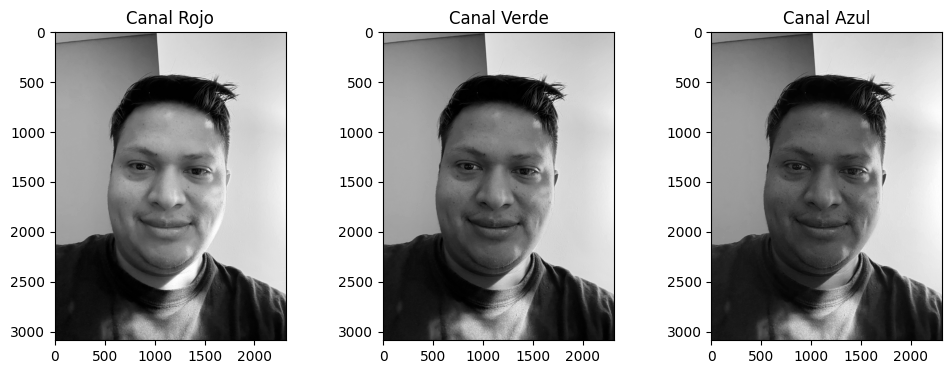

In [9]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en formato BGR (por defecto en OpenCV)
img = cv2.imread(nombre_archivo)

# Separar canales
b, g, r = cv2.split(img)

# Mostrar cada canal
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(r, cmap="gray")
plt.title("Canal Rojo")

plt.subplot(1,3,2)
plt.imshow(g, cmap="gray")
plt.title("Canal Verde")

plt.subplot(1,3,3)
plt.imshow(b, cmap="gray")
plt.title("Canal Azul")

plt.show()
